In [2]:
import sys
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import becquerel as bq
import scipy.integrate as integrate
import math as m
import importlib

In [3]:
import PF
import ROI

importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\Henricus\\Documents\\GitHub\\radwatch-analysis\\ROI.py'>

In [4]:
source_isotopes = np.array(['K-40']);
source_energies = np.array([1460]);
source_activities = np.array([1]);
spectrum = r'C:\Users\Henricus\Downloads\UCB087_Wild_King_Salmon_3.Spe'
background =r'C:\Users\Henricus\Downloads\UCB096_Backgorund_2_13_17.Spe'
branching_ratio = np.array([1]);

#Call scripts
roi = ROI.ROI(Spectrum.from_file(spectrum), Spectrum.from_file(background), source_energies)
roi.find_peak_energies()
roi_result = roi.get_counts()
peakfit=PF.PF(spectrum,background,source_energies)
#peakfit = PF.PF(source_energies,source_activities,spectrum,background,branching_ratio)
pf_result = peakfit.get_counts()
print(roi_result, pf_result)
print(source_energies)

SpeFile: Reading file C:\Users\Henricus\Downloads\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\Users\Henricus\Downloads\UCB096_Backgorund_2_13_17.Spe


c:\users\henricus\documents\github\becquerel\becquerel\core\spectrum.py:726: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  'have been converted to CPS', SpectrumWarning)
c:\users\henricus\documents\github\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


SpeFile: Reading file C:\Users\Henricus\Downloads\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\Users\Henricus\Downloads\UCB096_Backgorund_2_13_17.Spe
[57905.25] [57972.37394939]
[1461]


In [5]:
spec = Spectrum.from_file(spectrum)

counts = spec.counts_vals
energies = spec.energies_kev

#function to find index of closest energy where a is the desired energy and n is 
def f_near(a,a0):
    idx = np.abs(a - a0).argmin()
    return idx

k_40_idx = f_near(energies,source_energies[0])
print(k_40_idx)
print(energies[k_40_idx])

SpeFile: Reading file C:\Users\Henricus\Downloads\UCB087_Wild_King_Salmon_3.Spe
7993
1461.0726193348405


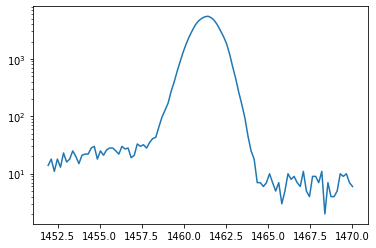

In [6]:
#test plotting
roi_low = k_40_idx - 50
roi_high = k_40_idx + 50

#Slice the counts array: select counts[start-index:stop-index]
plot_counts=counts[roi_low:roi_high]
plot_energies=energies[roi_low:roi_high]

plt.plot(plot_energies,plot_counts)
plt.yscale('log')

In [7]:
roi_low_bins, roi_peak_bins, roi_high_bins = roi.get_roi_windows(roi.target_peaks[0])
print(roi.window)

print(roi_low_bins[0])
print(roi_peak_bins[0])
print(roi_high_bins[0])

[[-2.  -1. ]
 [-0.5  0.5]
 [ 1.   2. ]]
[7938 7939 7940 7941 7942 7943 7944 7945 7946 7947 7948 7949 7950 7951
 7952 7953 7954 7955 7956 7957 7958 7959 7960 7961 7962 7963 7964 7965]
[7979 7980 7981 7982 7983 7984 7985 7986 7987 7988 7989 7990 7991 7992
 7993 7994 7995 7996 7997 7998 7999 8000 8001 8002 8003 8004 8005 8006]
[8020 8021 8022 8023 8024 8025 8026 8027 8028 8029 8030 8031 8032 8033
 8034 8035 8036 8037 8038 8039 8040 8041 8042 8043 8044 8045 8046 8047]


60115.0


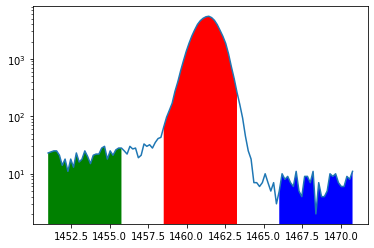

In [8]:
plot_counts = spec.counts_vals[roi_low_bins[0][0]:roi_high_bins[0][-1]]
plot_energies = spec.energies_kev[roi_low_bins[0][0]:roi_high_bins[0][-1]]

low_counts = counts[roi_low_bins[0][0]:roi_low_bins[0][-1]]
low_energies = energies[roi_low_bins[0][0]:roi_low_bins[0][-1]]

rlow=roi_high_bins[0][0]
rhi=roi_high_bins[0][-1]
high_counts=counts[rlow:rhi]
high_energies=energies[rlow:rhi]

rlow=roi_peak_bins[0][0]
rhi=roi_peak_bins[0][-1]
peak_counts=counts[rlow:rhi]
peak_energies=energies[rlow:rhi]
net_counts=np.sum(peak_counts)
print(net_counts)

fig, ax = plt.subplots()
ax.plot(plot_energies,plot_counts)
ax.fill_between(low_energies, 0, low_counts, facecolor='green', interpolate=True)
ax.fill_between(high_energies, 0, high_counts, facecolor='blue', interpolate=True)
ax.fill_between(peak_energies, 0, peak_counts, facecolor='red', interpolate=True)
#plt.plot(spec.energies_kev,spec.counts_vals)

ax.set_yscale('log')

In [10]:
spec = Spectrum.from_file(spectrum)
bg=Spectrum.from_file(background)
roi_low_bins, roi_peak_bins, roi_high_bins = roi.get_roi_windows(roi.target_peaks[0])

fgcounts=spec.counts_vals
bgcounts=bg.counts_vals

print("uncertainty----1")
rlow=roi_low_bins[0][0]
rhi=roi_low_bins[0][-1]
low_counts=fgcounts[rlow:rhi]-bgcounts[rlow:rhi]
roi_low=np.sum(low_counts)

rlow=roi_high_bins[0][0]
rhi=roi_high_bins[0][-1]
high_counts=fgcounts[rlow:rhi]-bgcounts[rlow:rhi]
roi_high=np.sum(high_counts)


rlow=roi_peak_bins[0][0]
rhi=roi_peak_bins[0][-1]
peak_counts=fgcounts[rlow:rhi]-bgcounts[rlow:rhi]
net_counts=np.sum(peak_counts)


roi_sigma=0.5*m.sqrt(roi_high+roi_low)
net_sigma=m.sqrt(net_counts)

sigma1=m.sqrt(net_sigma**2+roi_sigma**2)

print(sigma1)

print("uncertainty----2")
rlow=roi_low_bins[0][0]
rhi=roi_low_bins[0][-1]
low_fg_counts=fgcounts[rlow:rhi]
low_bg_counts=bgcounts[rlow:rhi]
roi_low_fg=np.sum(low_fg_counts)
roi_low_bg=np.sum(low_bg_counts)

rlow=roi_high_bins[0][0]
rhi=roi_high_bins[0][-1]
high_fg_counts=fgcounts[rlow:rhi]
high_bg_counts=bgcounts[rlow:rhi]
roi_high_fg=np.sum(high_fg_counts)
roi_high_bg=np.sum(high_bg_counts)

rlow=roi_peak_bins[0][0]
rhi=roi_peak_bins[0][-1]
peak_fg_counts=fgcounts[rlow:rhi]
peak_bg_counts=bgcounts[rlow:rhi]
peak_fg=np.sum(peak_fg_counts)
peak_bg=np.sum(peak_bg_counts)

roi_fg_sigma=0.5*m.sqrt(roi_low_fg+roi_high_fg)
roi_bg_sigma=0.5*m.sqrt(roi_low_bg+roi_high_bg)
peak_fg_sigma=m.sqrt(peak_fg+roi_fg_sigma**2)
peak_bg_sigma=m.sqrt(peak_bg+roi_bg_sigma**2)

sigma2=m.sqrt(peak_fg_sigma**2+peak_bg_sigma**2)
print(sigma2)

SpeFile: Reading file C:\Users\Henricus\Downloads\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\Users\Henricus\Downloads\UCB096_Backgorund_2_13_17.Spe
uncertainty----1
243.8103771376436
uncertainty----2
247.33580412063273


In [11]:
spec = Spectrum.from_file(spectrum)
bg=Spectrum.from_file(background)
energies = spec.energies_kev
#1
fgcounts=spec.counts_vals
bgcounts=bg.counts_vals
netcounts=fgcounts-bgcounts
roi_fgcounts=roi.spec.counts_vals
roi_bgcounts=roi.bg.counts_vals
roi_netcounts=roi.spec.counts_vals-roi.bg.counts_vals

def f_near(a,a0):
    idx = np.abs(a - a0).argmin()
    return idx

k_40_idx = f_near(energies,source_energies[0])
print(fgcounts[k_40_idx],bgcounts[k_40_idx],netcounts[k_40_idx],roi_fgcounts[k_40_idx],roi_bgcounts[k_40_idx],roi_netcounts[k_40_idx])




SpeFile: Reading file C:\Users\Henricus\Downloads\UCB087_Wild_King_Salmon_3.Spe
SpeFile: Reading file C:\Users\Henricus\Downloads\UCB096_Backgorund_2_13_17.Spe
5082.0 52.0 5030.0 5082.0 52.0 5030.0
